In [1]:
import pandas as pd
import numpy as np
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
def calc_metrics(tp, tn, fp, fn):
    # balanced accuracy
    se_total = tp + fn
    sp_total = fp + tn

    # Sensitivity / recall / TPR
    se = 0
    if se_total > 0:
        se = tp / se_total

    # Specificity / TNR
    sp = 0
    if sp_total > 0:
        sp = tn / sp_total

    # Balanced accuracy (Sensitivity + specificity) / 2
    bacc = (se + sp) / 2

    # Precision / PPV
    p_total = tp + fp
    p = 0
    if p_total > 0:
        p = tp / p_total

    # F1 score
    f1 = 0
    if (p + se) > 0:
        f1 = 2 * ((p * se)/(p+se))

    # MCC
    mcc = np.nan
    d = math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    if d > 0:
        mcc = ((tp * tn) - (fp * fn)) / d

    return [bacc, p, se, sp, f1, mcc]

In [3]:
# dataset
df_pos = pd.read_csv('data/binary_pdbs_classes.csv')
df_neg = pd.read_csv('data/binary_pdb_negatives.csv')
df = pd.concat([df_pos, df_neg])
df = df.loc[df['pdb_residue_id'].notnull()] # filter missing residues
df

/tmp/ipykernel_1241110/3585571110.py:2: DtypeWarning: Columns (3,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pos = pd.read_csv('data/binary_pdbs_classes.csv')
/tmp/ipykernel_1241110/3585571110.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_neg = pd.read_csv('data/binary_pdb_negatives.csv')


,pdb_id,pdb_chain,seqres_index,pdb_residue_id,REGION,CURATED,RDB1,RDB2,CATEGORY,UNIT_CURATED,UNIT_RDB1,UNIT_RDB2,PDB,classes,classes_names,topologies,topologies_names
2,3u3w,B,3,3.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
3,3u3w,B,4,4.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
4,3u3w,B,5,5.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
5,3u3w,B,6,6.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
6,3u3w,B,7,7.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733045,6b9i,A,284,284.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN
733046,6b9i,A,285,285.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN
733047,6b9i,A,286,286.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN
733048,6b9i,A,287,287.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN


In [4]:
# REPEATSDB-LITE EVALUATION (generate tables)

# rdb1
df['TP_1'] = np.where((df['RDB1'] == df['CURATED']) & (df['CURATED'] == 1), 1, 0)
df['TN_1'] = np.where((df['RDB1'] == df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FP_1'] = np.where((df['RDB1'] != df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FN_1'] = np.where((df['RDB1'] != df['CURATED']) & (df['CURATED'] == 1), 1, 0)

df['TP_2'] = np.where((df['RDB2'] == df['CURATED']) & (df['CURATED'] == 1), 1, 0)
df['TN_2'] = np.where((df['RDB2'] == df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FP_2'] = np.where((df['RDB2'] != df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FN_2'] = np.where((df['RDB2'] != df['CURATED']) & (df['CURATED'] == 1), 1, 0)

df

,pdb_id,pdb_chain,seqres_index,pdb_residue_id,REGION,CURATED,RDB1,RDB2,CATEGORY,UNIT_CURATED,...,topologies,topologies_names,TP_1,TN_1,FP_1,FN_1,TP_2,TN_2,FP_2,FN_2
2,3u3w,B,3,3.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
3,3u3w,B,4,4.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
4,3u3w,B,5,5.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
5,3u3w,B,6,6.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
6,3u3w,B,7,7.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733045,6b9i,A,284,284.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0
733046,6b9i,A,285,285.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0
733047,6b9i,A,286,286.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0
733048,6b9i,A,287,287.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0


In [5]:
df_prot = df.groupby(['pdb_id', 'pdb_chain']).agg({'CATEGORY': 'first', 'seqres_index':'count','TP_1': 'sum', 'TN_1': 'sum', 'FP_1': 'sum', 'FN_1': 'sum', 'TP_2': 'sum', 'TN_2': 'sum', 'FP_2': 'sum', 'FN_2': 'sum'})
df_prot.reset_index(inplace=True)
df_prot

,pdb_id,pdb_chain,CATEGORY,seqres_index,TP_1,TN_1,FP_1,FN_1,TP_2,TN_2,FP_2,FN_2
0,102l,A,0,163,0,71,92,0,0,49,114,0
1,13pk,A,0,415,0,346,69,0,0,217,198,0
2,1a0t,P,1,413,0,2,0,411,353,2,0,58
3,1a0t,Q,1,413,256,0,2,155,192,2,0,219
4,1a12,A,1,401,357,18,0,26,357,6,12,26
...,...,...,...,...,...,...,...,...,...,...,...,...
5252,7w3h,a,1,373,0,161,0,212,155,70,91,57
5253,7w3i,a,1,373,0,161,0,212,152,58,103,60
5254,7w3j,a,1,373,0,161,0,212,194,156,5,18
5255,7w3k,a,1,373,0,161,0,212,204,104,57,8


In [6]:
df_prot.set_index(['pdb_id', 'pdb_chain', 'seqres_index'], inplace=True)
df_prot = df_prot.drop(columns=['CATEGORY'])
df_prot.columns=pd.MultiIndex.from_arrays([['RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB2', 'RDB2', 'RDB2', 'RDB2'], ['TP', 'TN', 'FP', 'FN', 'TP', 'TN', 'FP', 'FN']])
df_prot

RDB1               RDB2               
                                TP   TN  FP   FN   TP   TN   FP   FN
pdb_id pdb_chain seqres_index                                       
102l   A         163             0   71  92    0    0   49  114    0
13pk   A         415             0  346  69    0    0  217  198    0
1a0t   P         413             0    2   0  411  353    2    0   58
       Q         413           256    0   2  155  192    2    0  219
1a12   A         401           357   18   0   26  357    6   12   26
...                            ...  ...  ..  ...  ...  ...  ...  ...
7w3h   a         373             0  161   0  212  155   70   91   57
7w3i   a         373             0  161   0  212  152   58  103   60
7w3j   a         373             0  161   0  212  194  156    5   18
7w3k   a         373             0  161   0  212  204  104   57    8
7wgo   A         276             0  182  94    0    0   88  188    0

[5257 rows x 8 columns]

In [7]:
# tp, tn fp, fn
# bacc, p, se, sp, f1, mcc
print(*df_prot['RDB1'].sum(), calc_metrics(*df_prot['RDB1'].sum()))
print(*df_prot['RDB2'].sum(), calc_metrics(*df_prot['RDB2'].sum()))

451973 756711 220411 557809 [0.6110115008186754, 0.672194757757472, 0.4475946293358368, 0.7744283723015141, 0.5373702714238665, 0.2345815727683996]
768967 461908 515214 240815 [0.6171203941721346, 0.5987995461698935, 0.7615178325618797, 0.4727229557823895, 0.6704266808139451, 0.2449319979510994]


In [8]:
# apply calc_metrics function to each row for both RDB1 and RDB2
data = []
for index, row in df_prot.iterrows():
    # print(*row['RDB1'], *calc_metrics(*row['RDB1']))
    data.append([index[0], index[1], index[2], *row[:4], *calc_metrics(*row['RDB1']), *row[4:], *calc_metrics(*row['RDB2'])])
df_ = pd.DataFrame(data)
df_

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,102l,A,163,0,71,92,0,0.217791,0.000000,0.000000,...,0,49,114,0,0.150307,0.000000,0.000000,0.300613,0.000000,NaN
1,13pk,A,415,0,346,69,0,0.416867,0.000000,0.000000,...,0,217,198,0,0.261446,0.000000,0.000000,0.522892,0.000000,NaN
2,1a0t,P,413,0,2,0,411,0.500000,0.000000,0.000000,...,353,2,0,58,0.929440,1.000000,0.858881,1.000000,0.924084,0.169202
3,1a0t,Q,413,256,0,2,155,0.311436,0.992248,0.622871,...,192,2,0,219,0.733577,1.000000,0.467153,1.000000,0.636816,0.065020
4,1a12,A,401,357,18,0,26,0.966057,1.000000,0.932115,...,357,6,12,26,0.632724,0.967480,0.932115,0.333333,0.949468,0.202828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,7w3h,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,155,70,91,57,0.582957,0.630081,0.731132,0.434783,0.676856,0.173419
5253,7w3i,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,152,58,103,60,0.538615,0.596078,0.716981,0.360248,0.650964,0.082253
5254,7w3j,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,194,156,5,18,0.942019,0.974874,0.915094,0.968944,0.944039,0.877710
5255,7w3k,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,204,104,57,8,0.804113,0.781609,0.962264,0.645963,0.862579,0.657230


In [9]:
df_.columns=pd.MultiIndex.from_arrays([[None, None, None, 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2'], ['pdb_id', 'pdb_chain', 'length', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc']])
df_

NaN                  RDB1                                              \
     pdb_id pdb_chain length   TP   TN  FP   FN      bacc         p        se   
0      102l         A    163    0   71  92    0  0.217791  0.000000  0.000000   
1      13pk         A    415    0  346  69    0  0.416867  0.000000  0.000000   
2      1a0t         P    413    0    2   0  411  0.500000  0.000000  0.000000   
3      1a0t         Q    413  256    0   2  155  0.311436  0.992248  0.622871   
4      1a12         A    401  357   18   0   26  0.966057  1.000000  0.932115   
...     ...       ...    ...  ...  ...  ..  ...       ...       ...       ...   
5252   7w3h         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5253   7w3i         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5254   7w3j         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5255   7w3k         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5256   7wgo         A    276    0  182  94    0  0.329710  0.000000  0.000000   

      ... RDB2                                                         \
      ...   TP   TN   FP   FN      bacc         p        se        sp   
0     ...    0   49  114    0  0.150307  0.000000  0.000000  0.300613   
1     ...    0  217  198    0  0.261446  0.000000  0.000000  0.522892   
2     ...  353    2    0   58  0.929440  1.000000  0.858881  1.000000   
3     ...  192    2    0  219  0.733577  1.000000  0.467153  1.000000   
4     ...  357    6   12   26  0.632724  0.967480  0.932115  0.333333   
...   ...  ...  ...  ...  ...       ...       ...       ...       ...   
5252  ...  155   70   91   57  0.582957  0.630081  0.731132  0.434783   
5253  ...  152   58  103   60  0.538615  0.596078  0.716981  0.360248   
5254  ...  194  156    5   18  0.942019  0.974874  0.915094  0.968944   
5255  ...  204  104   57    8  0.804113  0.781609  0.962264  0.645963   
5256  ...    0   88  188    0  0.159420  0.000000  0.000000  0.318841   

                          
            f1       mcc  
0     0.000000       NaN  
1     0.000000       NaN  
2     0.924084  0.169202  
3     0.636816  0.065020  
4     0.949468  0.202828  
...        ...       ...  
5252  0.676856  0.173419  
5253  0.650964  0.082253  
5254  0.944039  0.877710  
5255  0.862579  0.657230  
5256  0.000000       NaN  

[5257 rows x 23 columns]

In [10]:
df_.loc[:, ('RDB1', ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])]

RDB1                                                  
          bacc         p        se        sp        f1       mcc
0     0.217791  0.000000  0.000000  0.435583  0.000000       NaN
1     0.416867  0.000000  0.000000  0.833735  0.000000       NaN
2     0.500000  0.000000  0.000000  1.000000  0.000000       NaN
3     0.311436  0.992248  0.622871  0.000000  0.765321 -0.054069
4     0.966057  1.000000  0.932115  1.000000  0.964865  0.617511
...        ...       ...       ...       ...       ...       ...
5252  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5253  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5254  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5255  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5256  0.329710  0.000000  0.000000  0.659420  0.000000       NaN

[5257 rows x 6 columns]

<Axes: >

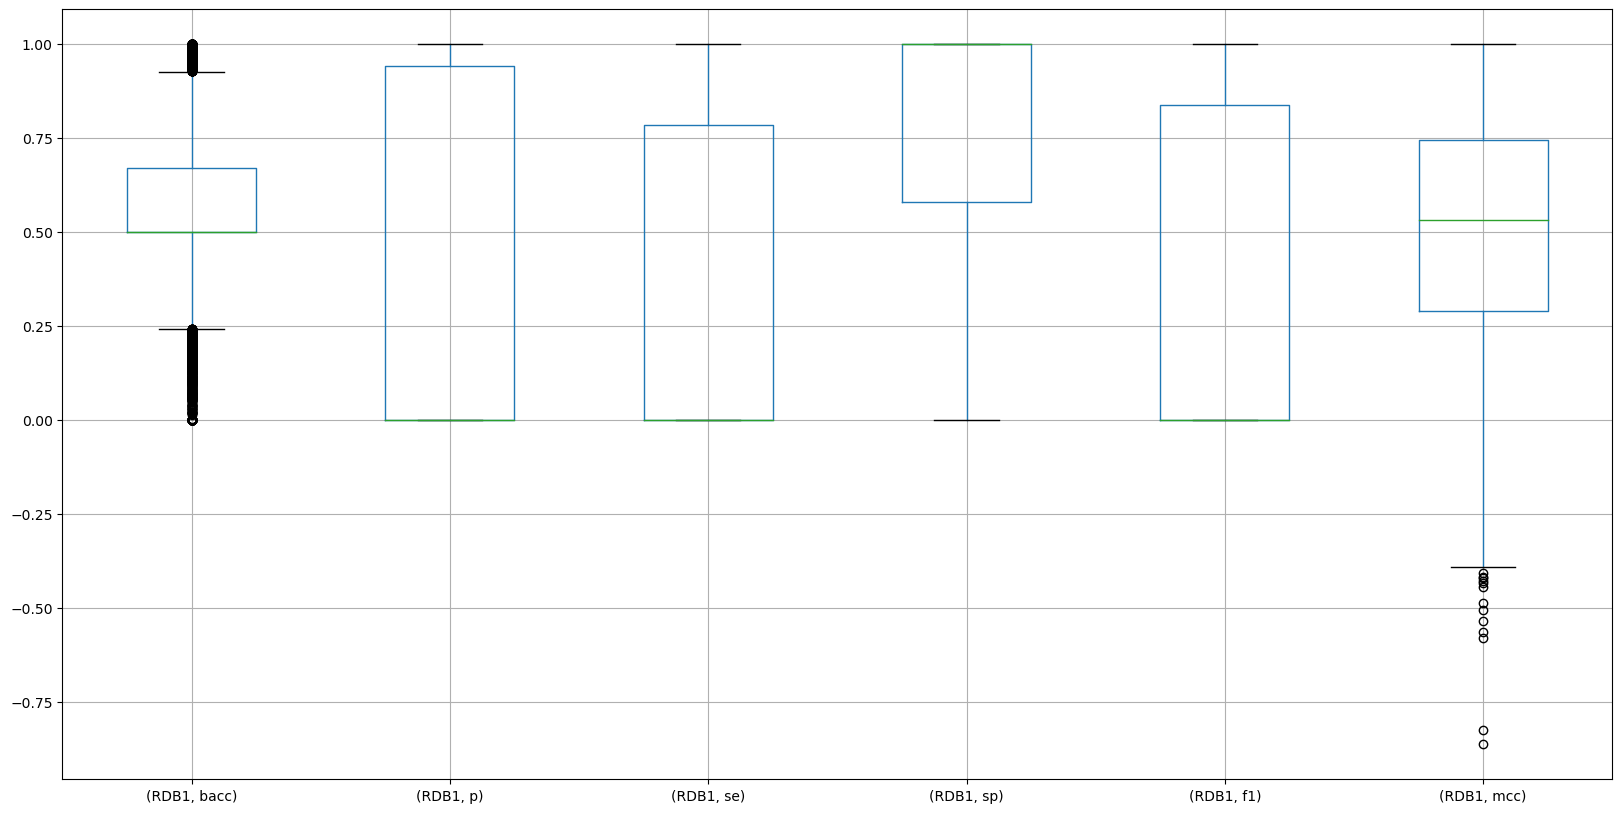

In [11]:
df_.loc[:,('RDB1', ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])].boxplot(figsize=(20,10))




In [12]:
# df_.loc[:,(slice(None), ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])].boxplot(figsize=(20,10))

In [13]:
# remove the ones with 2 topologies definition for simplification
df_topologies = df[~df["topologies"].astype(str).str.contains(';')]

df_topologies = df_topologies[['pdb_id', 'pdb_chain', 'topologies']]
#
df_all = pd.DataFrame(data)
df_all = df_all.rename(columns={0: "pdb_id", 1: "pdb_chain"})
# # plot
df_topologies = df_all.merge(df_topologies, how='left', on=['pdb_id', 'pdb_chain'])
df_topologies = df_topologies[df_topologies["topologies"].notna()]
df_topologies[['c', 't']] = df_topologies['topologies'].str.split('.', expand=True)
df_topologies["t"] = pd.to_numeric(df_topologies["t"])
df_topologies = df_topologies.sort_values(['c', 't'])
df_topologies

,pdb_id,pdb_chain,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,topologies,c,t
37384,1bn8,A,399,83,186,0,130,0.694836,1.000000,0.389671,...,33,0.605331,0.604027,0.845070,0.365591,0.704501,0.241693,3.1,3,1.0
37385,1bn8,A,399,83,186,0,130,0.694836,1.000000,0.389671,...,33,0.605331,0.604027,0.845070,0.365591,0.704501,0.241693,3.1,3,1.0
37386,1bn8,A,399,83,186,0,130,0.694836,1.000000,0.389671,...,33,0.605331,0.604027,0.845070,0.365591,0.704501,0.241693,3.1,3,1.0
37387,1bn8,A,399,83,186,0,130,0.694836,1.000000,0.389671,...,33,0.605331,0.604027,0.845070,0.365591,0.704501,0.241693,3.1,3,1.0
37388,1bn8,A,399,83,186,0,130,0.694836,1.000000,0.389671,...,33,0.605331,0.604027,0.845070,0.365591,0.704501,0.241693,3.1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920669,7t6r,D,606,134,185,209,78,0.550809,0.390671,0.632075,...,32,0.647879,0.452261,0.849057,0.446701,0.590164,0.297083,3.3,NaN,NaN
1920670,7t6r,D,606,134,185,209,78,0.550809,0.390671,0.632075,...,32,0.647879,0.452261,0.849057,0.446701,0.590164,0.297083,3.3,NaN,NaN
1920671,7t6r,D,606,134,185,209,78,0.550809,0.390671,0.632075,...,32,0.647879,0.452261,0.849057,0.446701,0.590164,0.297083,3.3,NaN,NaN
1920672,7t6r,D,606,134,185,209,78,0.550809,0.390671,0.632075,...,32,0.647879,0.452261,0.849057,0.446701,0.590164,0.297083,3.3,NaN,NaN


In [14]:
df_topologies.columns=pd.MultiIndex.from_arrays([['id', 'id', 'id', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'level', 'level', 'level'], ['pdb_id', 'pdb_chain', 'length', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc', 'full', 'c', 't']])
df_topologies

id                  RDB1                                     \
        pdb_id pdb_chain length   TP   TN   FP   FN      bacc         p   
37384     1bn8         A    399   83  186    0  130  0.694836  1.000000   
37385     1bn8         A    399   83  186    0  130  0.694836  1.000000   
37386     1bn8         A    399   83  186    0  130  0.694836  1.000000   
37387     1bn8         A    399   83  186    0  130  0.694836  1.000000   
37388     1bn8         A    399   83  186    0  130  0.694836  1.000000   
...        ...       ...    ...  ...  ...  ...  ...       ...       ...   
1920669   7t6r         D    606  134  185  209   78  0.550809  0.390671   
1920670   7t6r         D    606  134  185  209   78  0.550809  0.390671   
1920671   7t6r         D    606  134  185  209   78  0.550809  0.390671   
1920672   7t6r         D    606  134  185  209   78  0.550809  0.390671   
1920673   7t6r         D    606  134  185  209   78  0.550809  0.390671   

                   ... RDB2                                                    \
               se  ...   FN      bacc         p        se        sp        f1   
37384    0.389671  ...   33  0.605331  0.604027  0.845070  0.365591  0.704501   
37385    0.389671  ...   33  0.605331  0.604027  0.845070  0.365591  0.704501   
37386    0.389671  ...   33  0.605331  0.604027  0.845070  0.365591  0.704501   
37387    0.389671  ...   33  0.605331  0.604027  0.845070  0.365591  0.704501   
37388    0.389671  ...   33  0.605331  0.604027  0.845070  0.365591  0.704501   
...           ...  ...  ...       ...       ...       ...       ...       ...   
1920669  0.632075  ...   32  0.647879  0.452261  0.849057  0.446701  0.590164   
1920670  0.632075  ...   32  0.647879  0.452261  0.849057  0.446701  0.590164   
1920671  0.632075  ...   32  0.647879  0.452261  0.849057  0.446701  0.590164   
1920672  0.632075  ...   32  0.647879  0.452261  0.849057  0.446701  0.590164   
1920673  0.632075  ...   32  0.647879  0.452261  0.849057  0.446701  0.590164   

                  level            
              mcc  full    c    t  
37384    0.241693   3.1    3  1.0  
37385    0.241693   3.1    3  1.0  
37386    0.241693   3.1    3  1.0  
37387    0.241693   3.1    3  1.0  
37388    0.241693   3.1    3  1.0  
...           ...   ...  ...  ...  
1920669  0.297083   3.3  NaN  NaN  
1920670  0.297083   3.3  NaN  NaN  
1920671  0.297083   3.3  NaN  NaN  
1920672  0.297083   3.3  NaN  NaN  
1920673  0.297083   3.3  NaN  NaN  

[1242384 rows x 26 columns]

In [16]:
# plot
x = ['3.1 Beta-solenoid', '3.2 Alpha/beta solenoid',
     '3.3 Alpha-solenoid', '3.4 Beta hairpins', '3.6 Box', '4.1 TIM-barrel', '4.2 Beta-barrel / beta hairpins',
     '4.3 Beta-trefoil', '4.4 Propeller', '4.5 Alpha/beta prism',
     '4.6 Alpha-barrel', '4.7 Alpha/beta barrel','4.9 Alpha/beta trefoil',  '4.10 Aligned prism',
     '5.1 Alpha-beads', '5.2 Beta-beads', '5.3 Alpha/beta-beads', '5.4 Beta sandwich beads', '5.5 Alpha/beta sandwich beads']

# RDBL 1

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(
    y= np.array(df_topologies[('RDB2','bacc')].values.tolist()) -  np.array(df_topologies[('RDB1','bacc')].values.tolist()),
    x=x,
    name='accuracy',
    marker_color='#EDAE49'
), row=1, col=1)
fig.add_trace(go.Bar(
    y=np.array(df_topologies[('RDB2','p')].values.tolist()) - np.array(df_topologies[('RDB1','p')].values.tolist()),
    x=x,
    name='precision',
    marker_color='#D1495B'
), row=1, col=1)
fig.add_trace(go.Bar(
    y=np.array(df_topologies[('RDB2','se')].values.tolist()) - np.array(df_topologies[('RDB1','se')].values.tolist()),
    x=x,
    name='recall',
    marker_color='#00798C'
), row=1, col=1)
fig.write_image("plots/a_p_r_m_dataset_rdb3.png")